In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

import sys,os

In [2]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(0, path_parent+'/Telecom-Data-Analysis/scripts')

In [3]:
from EDA import *
from data_clean import *

In [4]:

df = pd.read_pickle('data/data_in_Dataframe.pkl') 
df_median = pd.read_pickle('data/df_median.pkl') 
df_knn = pd.read_pickle('data/df_knn.pkl') 
# df_iterative = pd.read_pickle('data/scaled_df_iterative.pkl') 


# Task 1

In [34]:

xDR_sessions = df_knn.groupby('MSISDN/Number')['Bearer Id'].count()
val = np.transpose([xDR_sessions.index[:].values,xDR_sessions.values])

df_customer = pd.DataFrame(data = val,columns=['ID','total_session'])

In [339]:
df_customer.isnull().sum()

ID                  0
total_session       0
session_duration    0
social_DL           0
Google_DL           0
Email_DL            0
Youtube_DL          0
Netflix_DL          0
Gaming_DL           0
Other_DL            0
Total_DL            0
social_UL           0
Google_UL           0
Email_UL            0
Youtube_UL          0
Netflix_UL          0
Gaming_UL           0
Other_UL            0
Total_UL            0
Decile_rank         0
dtype: int64

In [36]:
def aggregate_cols(dfa,dfb,cols,names):
    i = 0
    for col in cols:
        col_val = dfa.groupby('MSISDN/Number')[col].sum()
        dfb.insert(dfb.shape[1], names[i],list(col_val) )
        i+=1
    return dfb
        
        

In [37]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [38]:
columns = ['Dur. (ms)','Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Youtube DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)','Other DL (Bytes)','Total DL (Bytes)','Social Media UL (Bytes)','Google UL (Bytes)',
        'Email UL (Bytes)','Youtube UL (Bytes)','Netflix UL (Bytes)','Gaming UL (Bytes)','Other UL (Bytes)','Total UL (Bytes)']
names = ['session_duration','social_DL','Google_DL','Email_DL','Youtube_DL','Netflix_DL','Gaming_DL','Other_DL','Total_DL','social_UL',
        'Google_UL', 'Email_UL', 'Youtube_UL', 'Netflix_UL', 'Gaming_UL', 'Other_UL','Total_UL']
df_customer = aggregate_cols(dfa = df_knn,dfb=df_customer,cols=columns,names=names)

In [39]:
# Decile Classification
df_customer['Decile_rank'] = pd.qcut(df_customer['session_duration'], 10,
                            labels = False)

In [40]:
df_customer.Decile_rank.value_counts()

3    11876
5    10647
7    10647
6    10647
1    10647
8    10647
9    10647
2    10647
0    10647
4     9418
Name: Decile_rank, dtype: int64

In [41]:
df_customer.dtypes

ID                  float64
total_session       float64
session_duration    float64
social_DL           float64
Google_DL           float64
Email_DL            float64
Youtube_DL          float64
Netflix_DL          float64
Gaming_DL           float64
Other_DL            float64
Total_DL            float64
social_UL           float64
Google_UL           float64
Email_UL            float64
Youtube_UL          float64
Netflix_UL          float64
Gaming_UL           float64
Other_UL            float64
Total_UL            float64
Decile_rank           int64
dtype: object

# Univariate Analysis

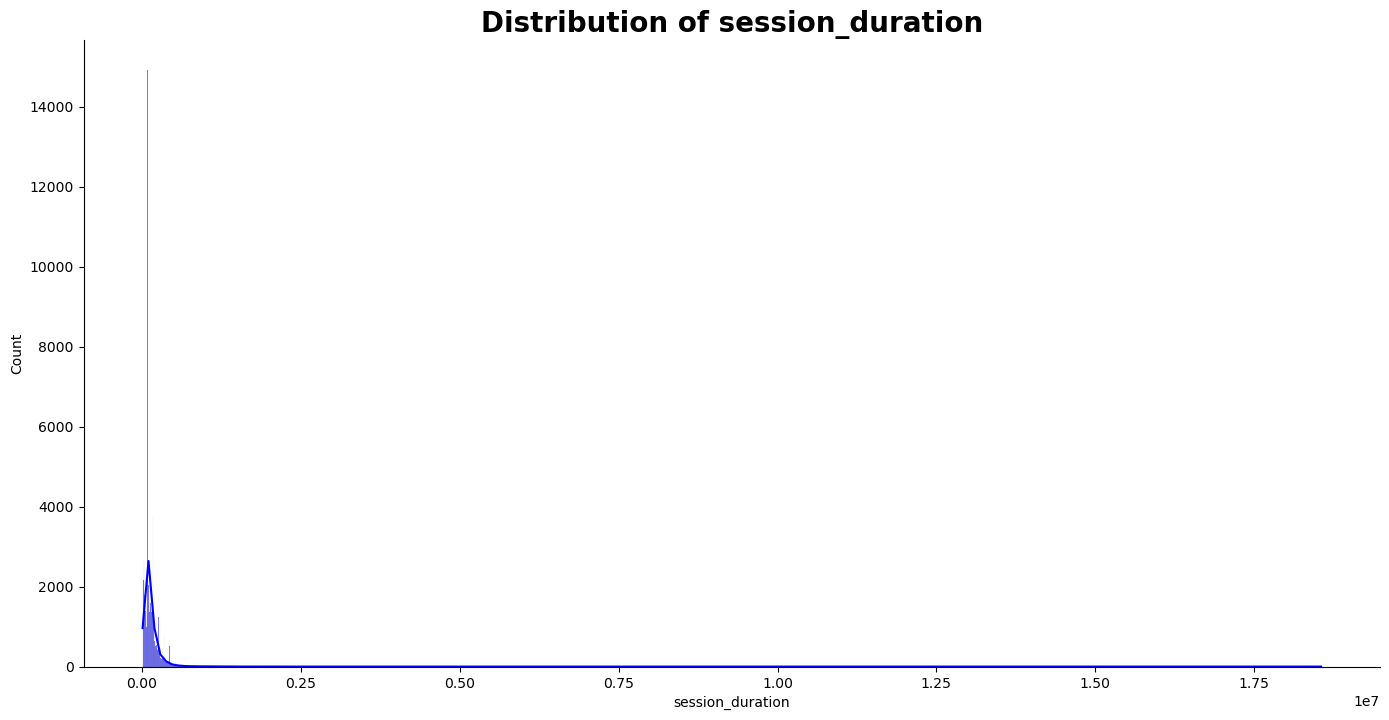

In [42]:
plot_hist(df_customer, "session_duration", "blue")


In [43]:
df_customer[df_customer.columns[1:]].describe()

,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
count,"106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00"
mean,1.39,"146,571.71","2,503,891.64","8,022,645.40","2,499,181.85","16,227,074.20","16,217,736.22","588,700,325.58","587,423,786.30","634,170,854.89","45,919.73","2,868,141.32","651,933.57","15,354,851.41","15,345,475.35","11,562,360.16","11,524,767.93","57,353,449.47",4.49
std,0.81,"186,563.54","1,889,200.77","6,070,427.84","1,898,793.50","12,333,100.61","12,327,021.26","444,430,994.67","444,138,609.41","464,985,514.16","34,745.46","2,174,776.55","495,278.08","11,608,448.33","11,619,419.87","8,739,142.86","8,714,902.15","35,696,764.77",2.88
min,1.00,"7,142.00",12.00,207.00,97.00,53.00,42.00,"2,516.00","3,290.00","8,827,082.00",0.00,3.00,14.00,106.00,35.00,59.00,156.00,"2,866,892.00",0.00
25%,1.00,"72,398.75","1,176,564.75","3,806,869.50","1,185,380.00","7,653,916.50","7,601,092.75","279,543,491.50","277,183,579.75","314,994,241.50","21,612.50","1,342,230.00","306,743.50","7,250,921.00","7,216,482.25","5,451,237.75","5,463,061.00","36,401,909.25",2.00
50%,1.00,"103,136.50","2,266,385.00","7,261,226.00","2,267,410.00","14,614,967.50","14,645,875.00","532,902,800.50","530,207,819.50","570,733,717.00","41,595.00","2,595,124.50","587,612.00","13,880,600.50","13,888,862.50","10,451,768.00","10,381,155.00","46,812,733.00",4.50
75%,2.00,"172,799.00","3,268,742.50","10,436,099.75","3,252,060.75","21,140,317.25","21,141,808.75","767,398,354.25","765,667,570.75","807,829,137.50","59,944.00","3,745,607.00","852,832.25","19,985,931.75","20,017,002.75","15,086,851.25","15,034,856.50","65,860,702.25",7.00
max,18.00,"18,553,754.00","42,743,837.00","116,106,455.00","33,607,211.00","237,883,033.00","199,479,238.00","7,622,035,401.00","8,025,476,831.00","8,156,743,493.00","630,942.00","36,085,397.00","9,013,997.00","215,075,736.00","203,241,873.00","154,789,688.00","152,930,478.00","729,577,380.00",9.00


In [44]:
df_customer.total_session.nunique()

17

In [45]:
df_customer.total_session.value_counts()

1.00     77383
2.00     21419
3.00      4418
4.00      1949
5.00       938
6.00       208
7.00        75
8.00        34
9.00        17
10.00       12
12.00        5
11.00        5
17.00        2
15.00        2
18.00        1
16.00        1
13.00        1
Name: total_session, dtype: int64

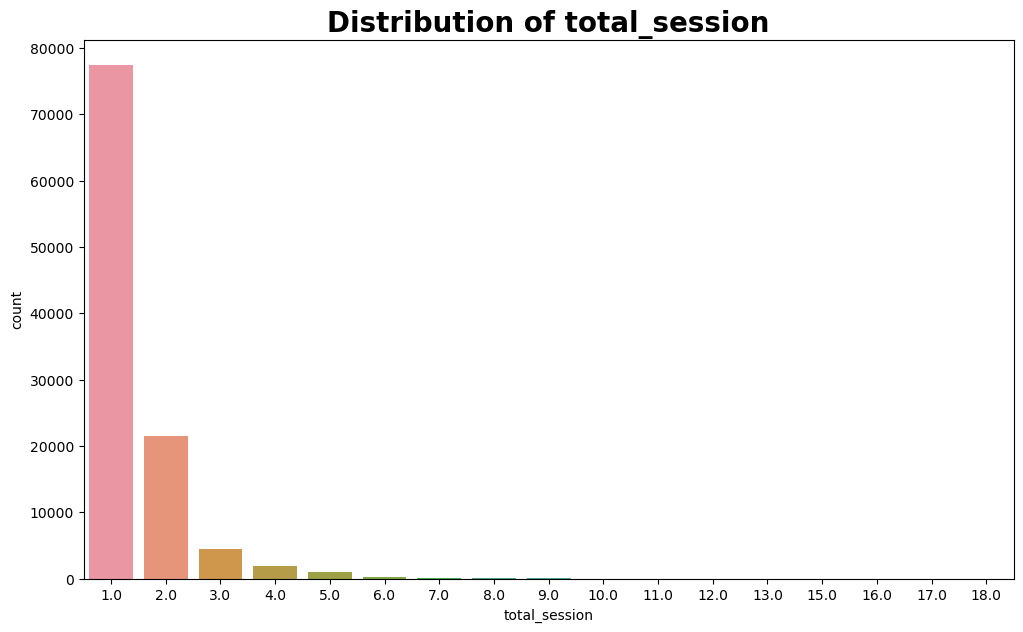

In [46]:
plot_count(df_customer, 'total_session')


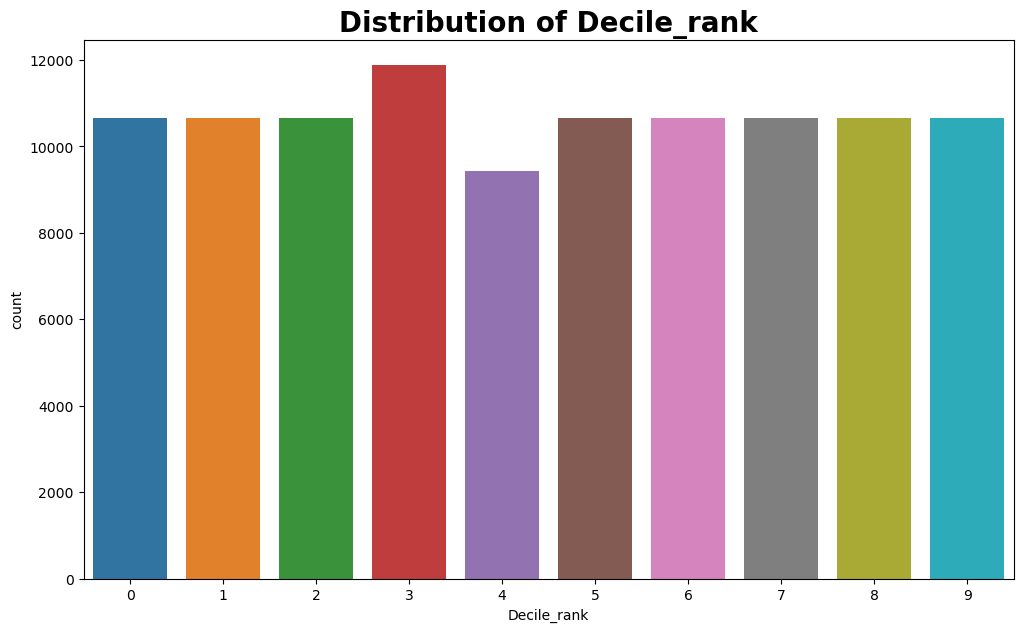

In [47]:
plot_count(df_customer, 'Decile_rank')


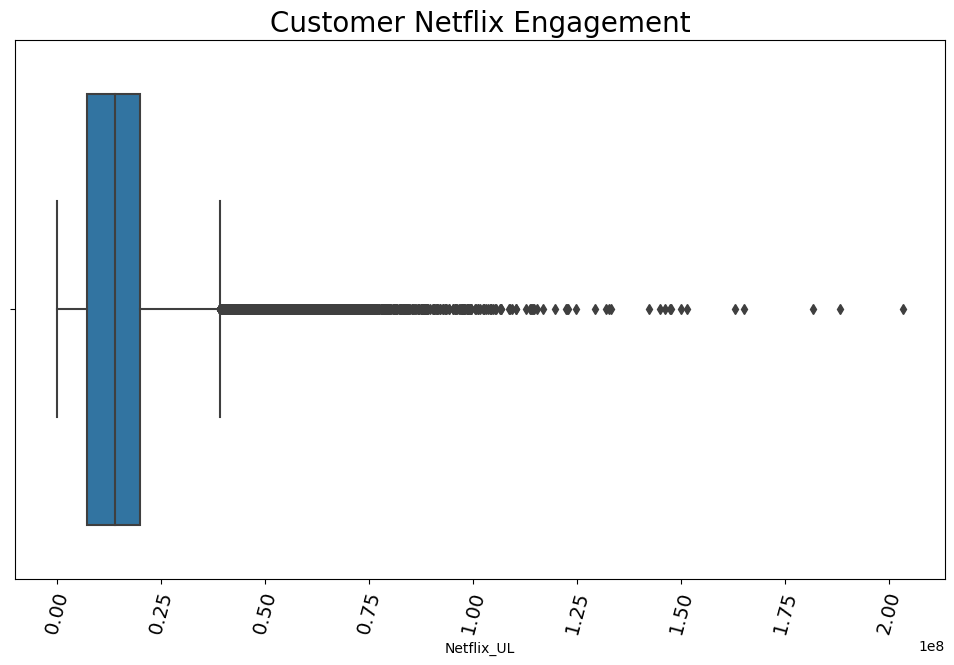

In [48]:
plot_box(df_customer,'Netflix_UL','Customer Netflix Engagement')

In [49]:
df_customer['Netflix_UL'] = fix_outlier(df=df_customer,column='Netflix_UL')

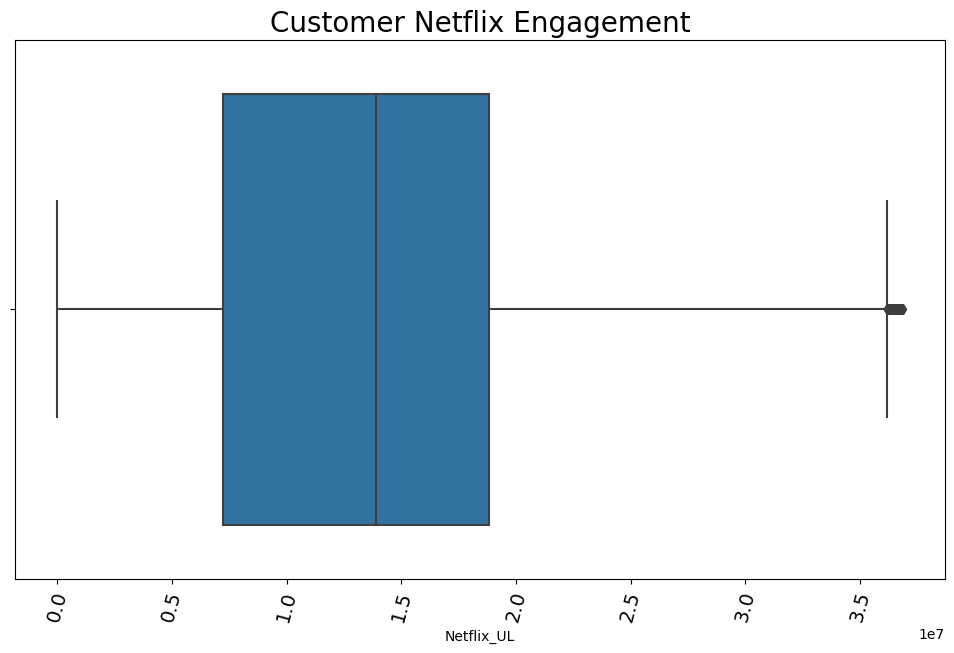

In [50]:
plot_box(df_customer,'Netflix_UL','Customer Netflix Engagement')

In [51]:
cols = df_customer.columns[2:]
for col in cols:
    df_customer[col] = fix_outlier(df=df_customer,column=col)

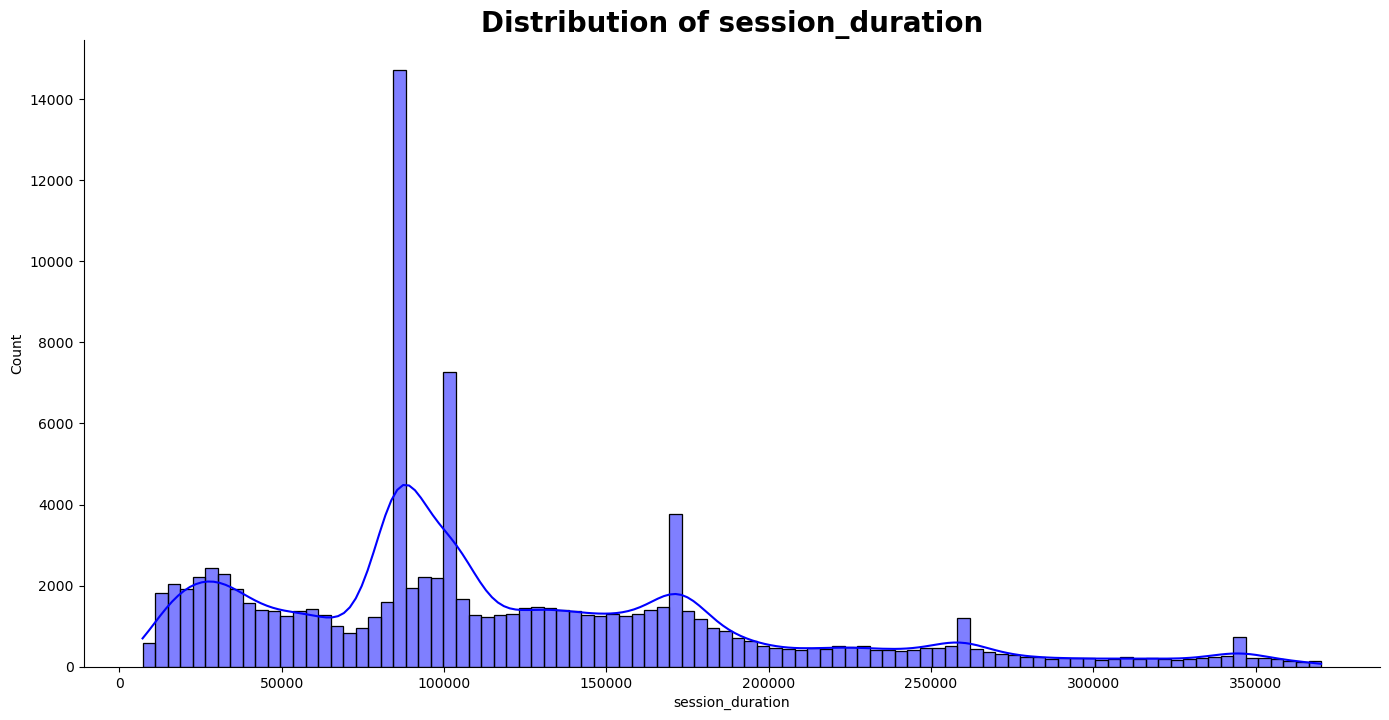

In [52]:
plot_hist(df=df_customer,column='session_duration',color='blue')

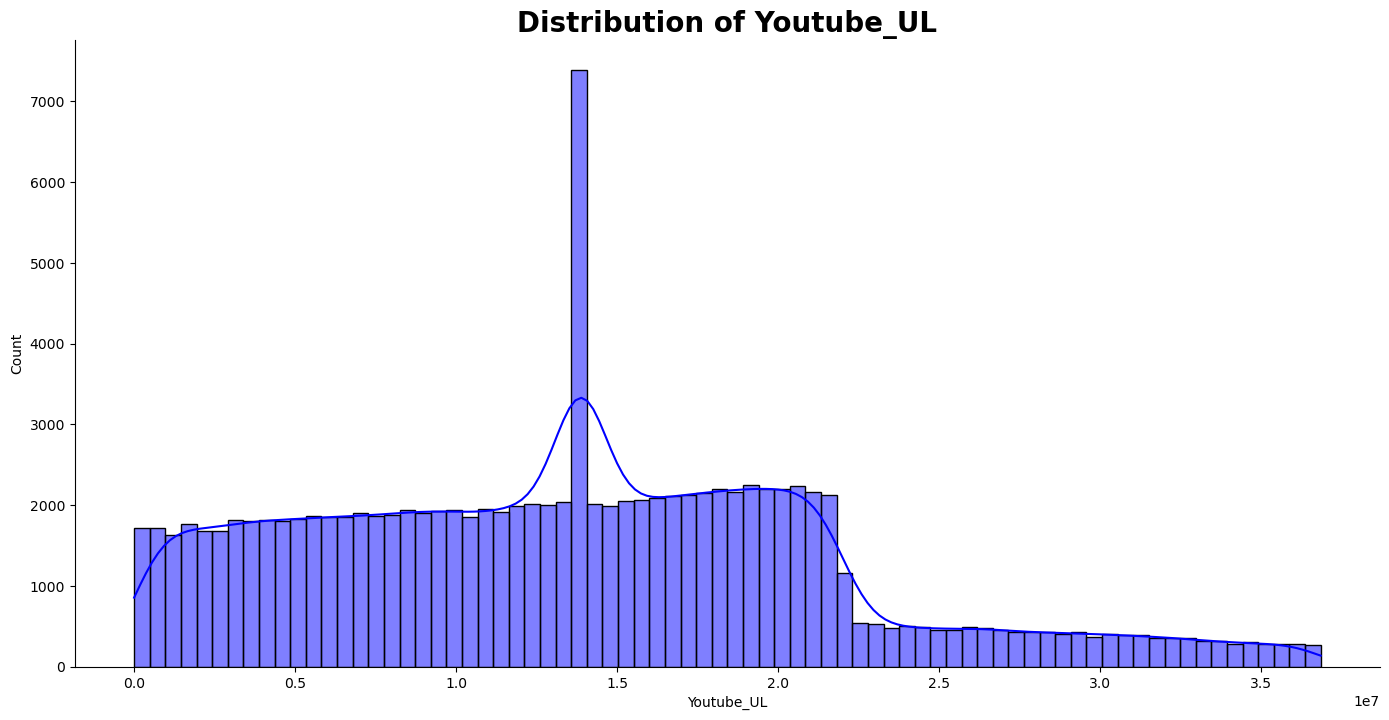

In [53]:
plot_hist(df=df_customer,column='Youtube_UL',color='blue')

# Multivariate Analysis

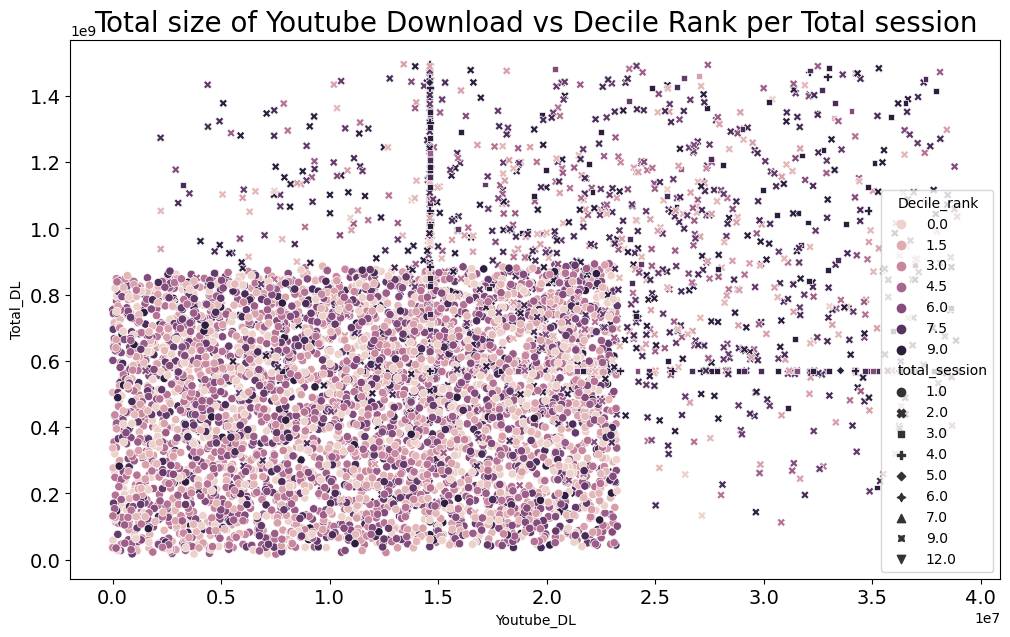

In [54]:
plot_scatter(df_customer.head(6000), x_col="Youtube_DL", y_col="Total_DL", hue="Decile_rank",
             style="total_session", title="Total size of Youtube Download vs Decile Rank per Total session")

<AxesSubplot:>

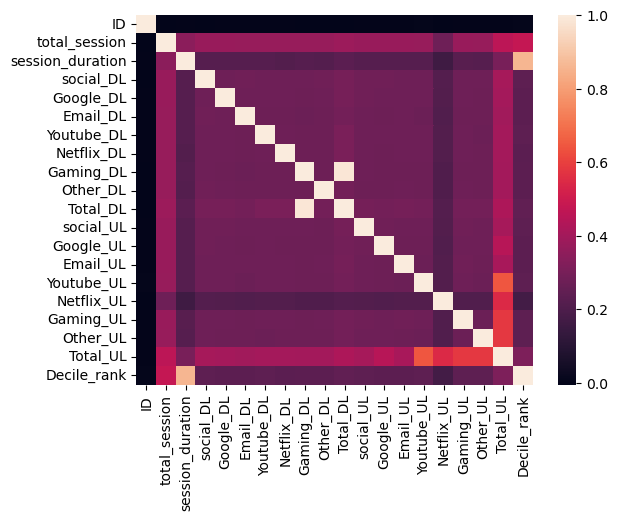

In [55]:
corr_mat = df_customer.corr()
sns.heatmap(corr_mat)

In [56]:
df_customer.describe()

,ID,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
count,"106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00"
mean,"45,156,222,844.52",1.39,"120,035.43","2,218,022.84","7,098,762.81","2,210,010.94","14,347,778.01","14,337,148.94","521,220,651.52","519,780,006.90","562,606,894.34","40,660.13","2,537,400.90","576,429.75","13,588,832.67","12,641,295.36","10,237,550.22","10,194,944.11","51,170,246.00",4.49
std,"2,894,656,369,110.26",0.81,"76,957.77","1,317,336.88","4,202,973.00","1,309,994.23","8,537,966.82","8,544,002.87","308,855,123.62","309,300,091.97","318,913,281.87","24,224.01","1,508,949.13","343,111.89","8,050,162.17","6,774,705.52","6,088,551.38","6,047,125.09","22,059,087.02",2.88
min,"33,601,001,722.00",1.00,"7,142.00",12.00,207.00,97.00,53.00,42.00,"2,516.00","3,290.00","8,827,082.00",0.00,3.00,14.00,106.00,35.00,59.00,156.00,"2,866,892.00",0.00
25%,"33,650,879,797.25",1.00,"72,398.75","1,176,564.75","3,806,869.50","1,185,380.00","7,653,916.50","7,601,092.75","279,543,491.50","277,183,579.75","314,994,241.50","21,612.50","1,342,230.00","306,743.50","7,250,921.00","7,216,482.25","5,451,237.75","5,463,061.00","36,401,909.25",2.00
50%,"33,663,653,873.50",1.00,"103,136.25","2,266,358.50","7,261,212.50","2,267,409.50","14,614,951.25","14,645,778.50","532,901,937.25","530,205,716.25","570,732,888.50","41,595.00","2,595,121.75","587,610.00","13,880,525.75","13,888,806.62","10,451,720.50","10,381,115.50","46,812,537.50",4.50
75%,"33,683,450,413.25",2.00,"163,947.25","3,075,927.25","9,820,920.00","3,055,981.50","19,905,720.75","19,894,234.00","721,282,120.50","719,305,540.75","761,470,399.00","56,381.75","3,521,573.50","800,840.00","18,816,048.50","17,612,069.00","14,203,571.50","14,128,269.00","59,033,585.75",7.00
max,"882,397,108,489,451.00",18.00,"370,201.00","6,002,486.00","19,285,894.00","6,006,410.00","39,021,313.00","38,964,240.00","1,411,628,613.00","1,414,389,516.00","1,496,498,888.00","110,758.00","6,892,198.00","1,568,634.00","36,847,541.00","29,186,818.00","27,792,305.00","27,652,069.00","124,565,123.00",9.00


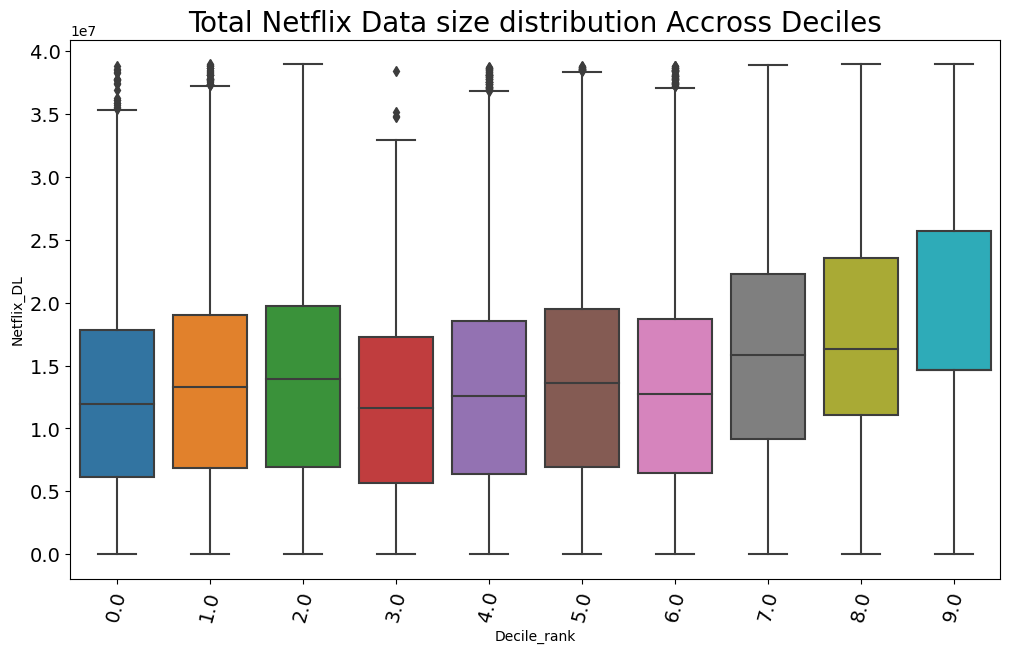

In [57]:
plot_box_multi(df_customer, x_col="Decile_rank", y_col="Netflix_DL", title="Total Netflix Data size distribution Accross Deciles")

In [58]:
dfPair = df_customer[['total_session','Youtube_DL','Email_DL','Google_DL','Total_DL']].head(500)

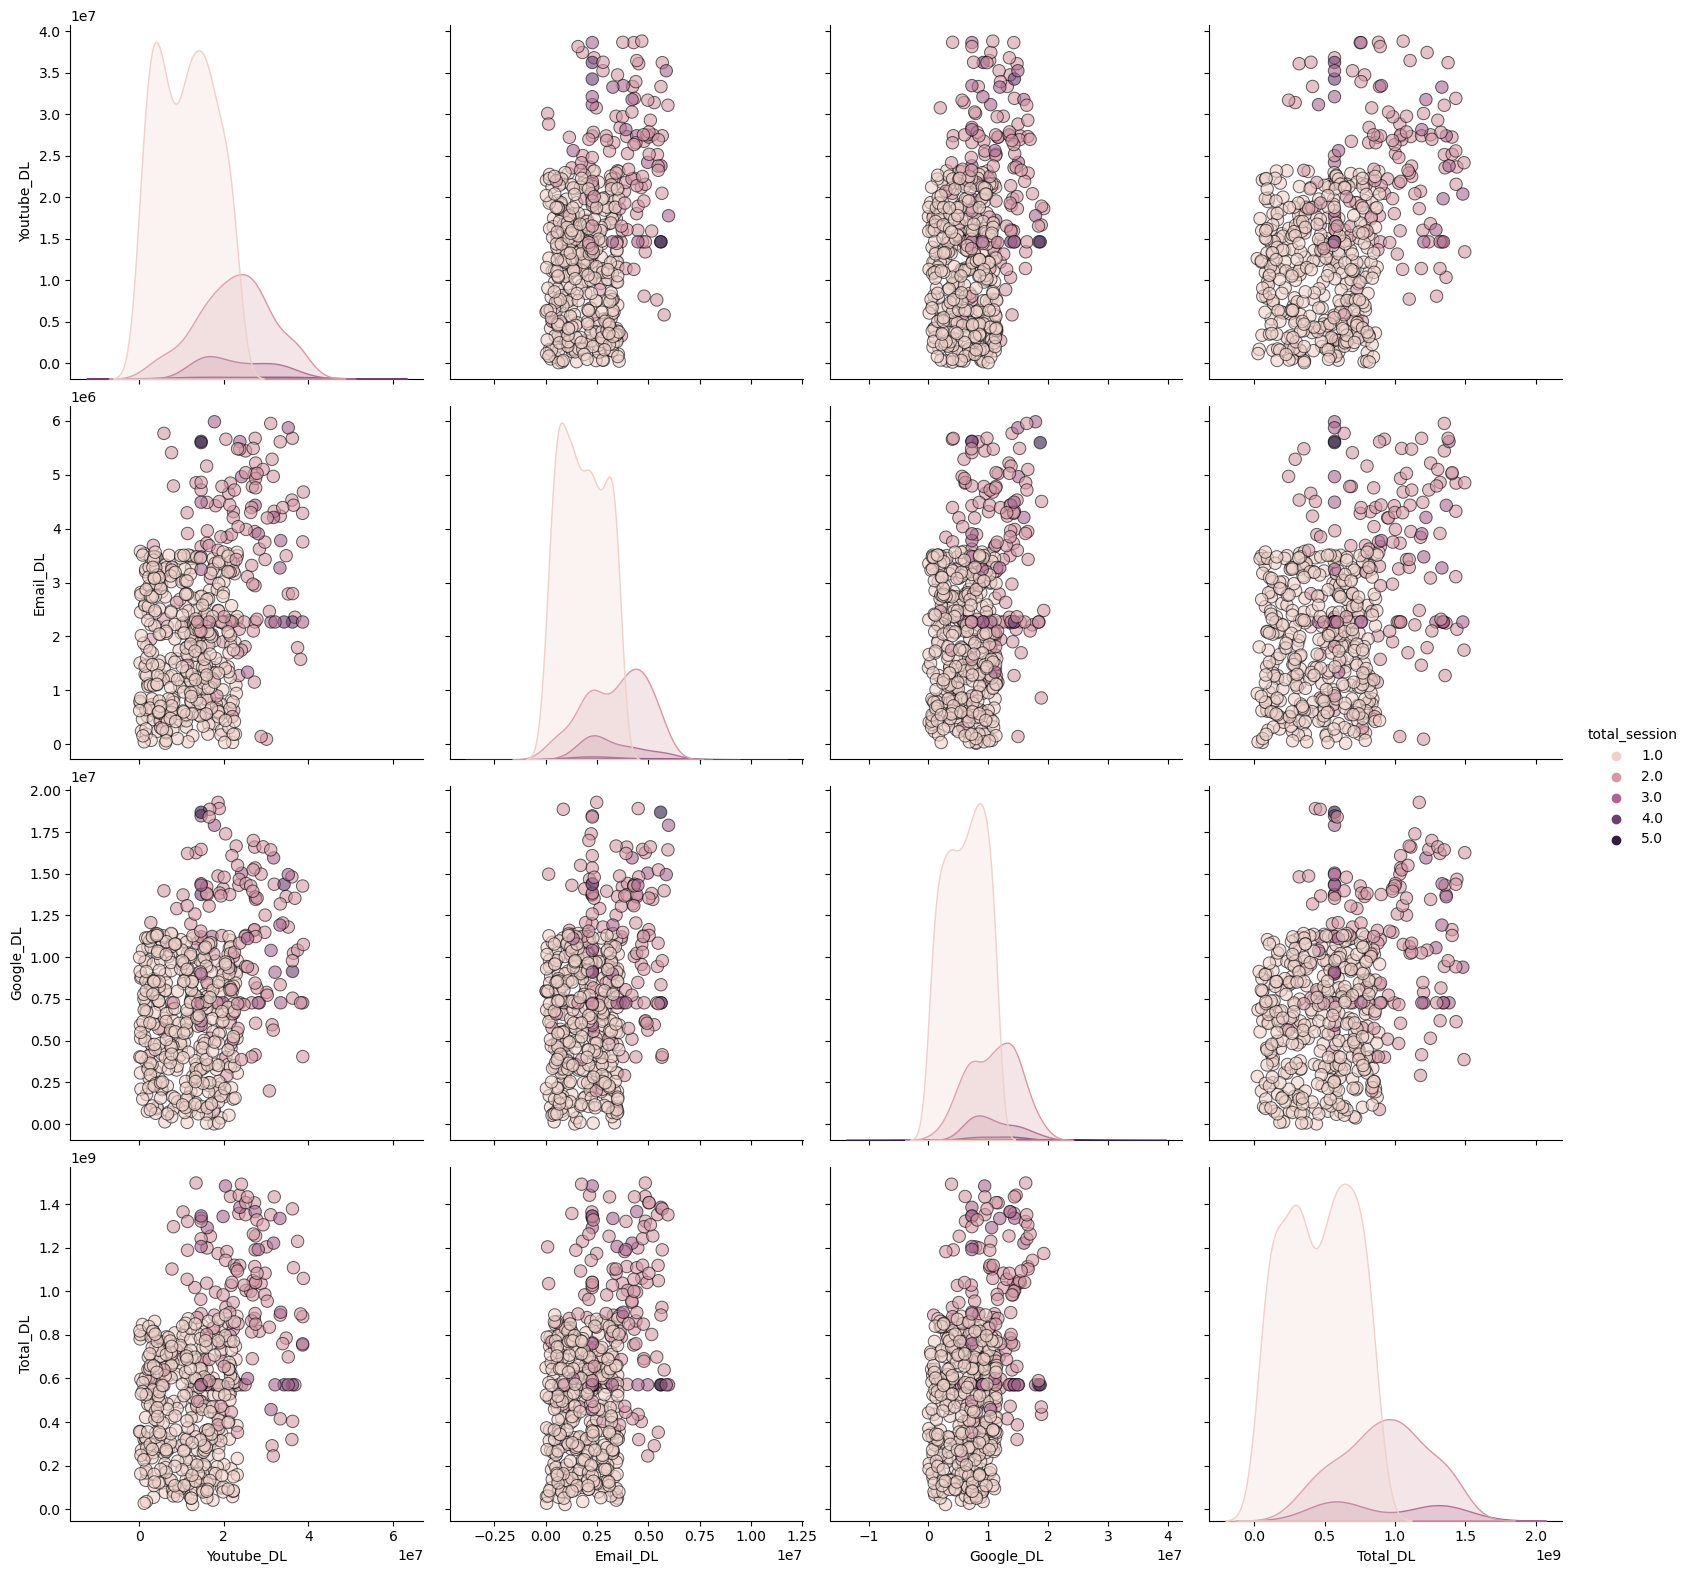

In [59]:
sns.pairplot(dfPair, hue = 'total_session', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

In [60]:
print("Percentage of User Engagement(Download) Across Multiple Platforms")
df_customer[df_customer.columns[3:10]].sum()/df_customer[df_customer.columns[3:11]].sum()['Total_DL']*100

Percentage of User Engagement(Download) Across Multiple Platforms


social_DL     0.39
Google_DL     1.26
Email_DL      0.39
Youtube_DL    2.55
Netflix_DL    2.55
Gaming_DL    92.64
Other_DL     92.39
dtype: float64

In [61]:
df_customer[df_customer.columns[3:11]].sum()

social_DL       236,152,891,795.00
Google_DL       755,805,276,008.00
Email_DL        235,299,864,859.00
Youtube_DL    1,527,607,925,078.00
Netflix_DL    1,526,476,247,939.00
Gaming_DL    55,494,362,766,987.00
Other_DL     55,340,977,334,582.00
Total_DL     59,900,756,040,160.00
dtype: float64

In [62]:
print("Percentage of User Engagement(Upload) Across Multiple Platforms")

df_customer[df_customer.columns[11:-2]].sum()/df_customer[df_customer.columns[11:-1]].sum()['Total_UL']*100

Percentage of User Engagement(Upload) Across Multiple Platforms


social_UL     0.08
Google_UL     4.96
Email_UL      1.13
Youtube_UL   26.56
Netflix_UL   24.70
Gaming_UL    20.01
Other_UL     19.92
dtype: float64

In [226]:
df_customer[df_customer.columns[11:-1]].sum()

social_UL        4,329,084,280.00
Google_UL      270,157,073,646.00
Email_UL        61,372,475,343.00
Youtube_UL   1,446,803,014,001.00
Netflix_UL   1,345,918,716,724.00
Gaming_UL    1,089,991,971,488.00
Other_UL     1,085,455,699,643.00
Total_UL     5,448,096,091,462.00
dtype: float64

## Dimensionality Reduction

In [64]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)

In [65]:
# scaling the dataset
df_customer_scaled = df_customer.copy()
df_customer_scaled.iloc[:,2:] = scale_dataframe(df = df_customer_scaled.iloc[:,2:],cols=df_customer.columns[2:])

In [66]:
df_customer_scaled

,ID,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
0,"33,601,001,722.00",1.00,0.30,0.37,0.17,0.14,0.38,0.26,0.57,0.27,0.56,0.23,0.15,0.31,0.18,0.58,0.05,0.34,0.27,0.56
1,"33,601,001,754.00",1.00,0.48,0.43,0.22,0.47,0.14,0.02,0.07,0.20,0.08,0.56,0.16,0.31,0.19,0.36,0.53,0.08,0.27,0.78
2,"33,601,002,511.00",1.00,0.35,0.52,0.17,0.41,0.05,0.42,0.37,0.35,0.37,0.43,0.01,0.49,0.52,0.10,0.35,0.24,0.30,0.67
3,"33,601,007,832.00",1.00,0.12,0.04,0.31,0.36,0.11,0.03,0.27,0.02,0.26,0.26,0.54,0.07,0.07,0.03,0.11,0.36,0.14,0.11
4,"33,601,008,617.00",2.00,0.08,0.48,0.71,0.37,0.26,0.64,0.93,0.55,0.91,0.46,0.69,0.67,0.85,0.83,0.21,0.98,0.75,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106465,"33,789,996,170.00",1.00,0.00,0.04,0.35,0.08,0.21,0.38,0.47,0.21,0.46,0.59,0.10,0.34,0.50,0.01,0.11,0.14,0.20,0.00
106466,"33,789,997,247.00",1.00,0.37,0.07,0.08,0.42,0.14,0.18,0.30,0.14,0.29,0.51,0.57,0.00,0.39,0.05,0.34,0.23,0.27,0.67
106467,"3,197,020,876,596.00",1.00,0.26,0.11,0.44,0.14,0.25,0.27,0.12,0.33,0.13,0.42,0.27,0.43,0.06,0.56,0.49,0.10,0.28,1.00
106468,"337,000,037,000,919.00",1.00,0.68,0.08,0.43,0.50,0.43,0.26,0.36,0.10,0.36,0.23,0.23,0.21,0.54,0.72,0.32,0.17,0.44,0.89


In [67]:
df_customer_scaled.head(5)

,ID,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
0,"33,601,001,722.00",1.00,0.30,0.37,0.17,0.14,0.38,0.26,0.57,0.27,0.56,0.23,0.15,0.31,0.18,0.58,0.05,0.34,0.27,0.56
1,"33,601,001,754.00",1.00,0.48,0.43,0.22,0.47,0.14,0.02,0.07,0.20,0.08,0.56,0.16,0.31,0.19,0.36,0.53,0.08,0.27,0.78
2,"33,601,002,511.00",1.00,0.35,0.52,0.17,0.41,0.05,0.42,0.37,0.35,0.37,0.43,0.01,0.49,0.52,0.10,0.35,0.24,0.30,0.67
3,"33,601,007,832.00",1.00,0.12,0.04,0.31,0.36,0.11,0.03,0.27,0.02,0.26,0.26,0.54,0.07,0.07,0.03,0.11,0.36,0.14,0.11
4,"33,601,008,617.00",2.00,0.08,0.48,0.71,0.37,0.26,0.64,0.93,0.55,0.91,0.46,0.69,0.67,0.85,0.83,0.21,0.98,0.75,0.11


In [68]:
x = df_customer.iloc[:,1:-1]

In [70]:
x

,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL
0,1.00,"116,720.00","2,206,504.00","3,337,123.00","837,400.00","14,900,201.00","10,265,105.00","811,091,133.00","377,096,990.00","842,637,466.00","25,631.00","1,051,882.00","493,962.00","6,724,347.00","16,915,876.00","1,367,528.00","9,473,882.00","36,053,108.00"
1,1.00,"181,230.00","2,598,548.00","4,197,697.00","2,828,821.00","5,324,251.00","770,569.00","105,035,298.00","279,557,701.00","120,755,184.00","62,017.00","1,137,166.00","478,960.00","7,107,972.00","10,451,194.00","14,714,780.00","2,152,370.00","36,104,459.00"
2,1.00,"134,969.00","3,148,004.00","3,343,483.00","2,436,500.00","2,137,272.00","16,525,919.00","529,068,485.00","495,086,501.00","556,659,663.00","47,619.00","99,643.00","768,880.00","19,196,298.00","2,827,981.00","9,759,228.00","6,607,171.00","39,306,820.00"
3,1.00,"49,878.00","251,469.00","5,937,765.00","2,178,618.00","4,393,123.00","1,157,362.00","388,074,835.00","25,248,001.00","401,993,172.00","28,825.00","3,740,728.00","106,052.00","2,584,198.00","784,730.00","3,051,292.00","10,031,701.00","20,327,526.00"
4,2.00,"37,104.00","2,861,230.00","13,728,668.00","2,247,808.00","10,339,971.00","24,971,647.00","1,308,981,093.00","777,643,713.00","1,363,130,417.00","51,312.00","4,770,948.00","1,057,661.00","31,193,031.00","24,230,077.00","5,816,727.00","27,160,771.00","94,280,527.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106465,1.00,"8,810.00","234,320.00","6,834,178.00","480,946.00","8,294,310.00","14,754,741.00","657,326,717.00","291,391,283.00","687,925,212.00","65,863.00","697,091.00","525,969.00","18,353,533.00","147,797.00","3,034,642.00","3,891,534.00","26,716,429.00"
106466,1.00,"140,988.00","442,214.00","1,472,406.00","2,513,433.00","5,596,862.00","6,929,961.00","427,620,216.00","204,636,073.00","444,575,092.00","56,355.00","3,957,299.00",664.00,"14,254,710.00","1,601,099.00","9,383,076.00","6,479,040.00","35,732,243.00"
106467,1.00,"103,136.50","668,596.00","8,572,779.00","842,279.00","9,839,889.00","10,340,908.00","164,563,605.00","467,678,100.00","194,828,056.00","46,628.00","1,865,881.00","678,492.00","2,120,016.00","16,251,392.00","13,485,133.00","2,848,373.00","37,295,915.00"
106468,1.00,"253,030.00","496,337.00","8,215,537.00","2,989,663.00","16,690,728.00","9,983,678.00","501,259,042.00","144,354,057.00","539,634,985.00","25,229.00","1,615,080.00","328,919.00","20,044,212.00","20,921,364.00","8,883,653.00","4,834,382.00","56,652,839.00"


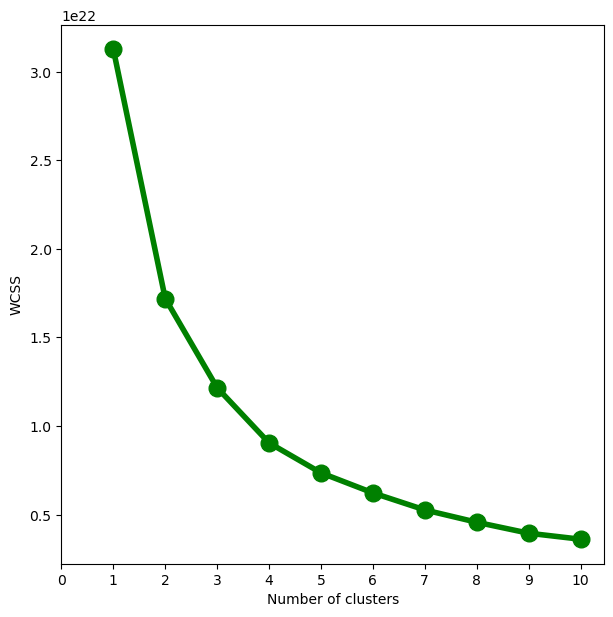

In [99]:
# Find the optimal cluster using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [73]:
pca = PCA(2)
data = pca.fit_transform(x)

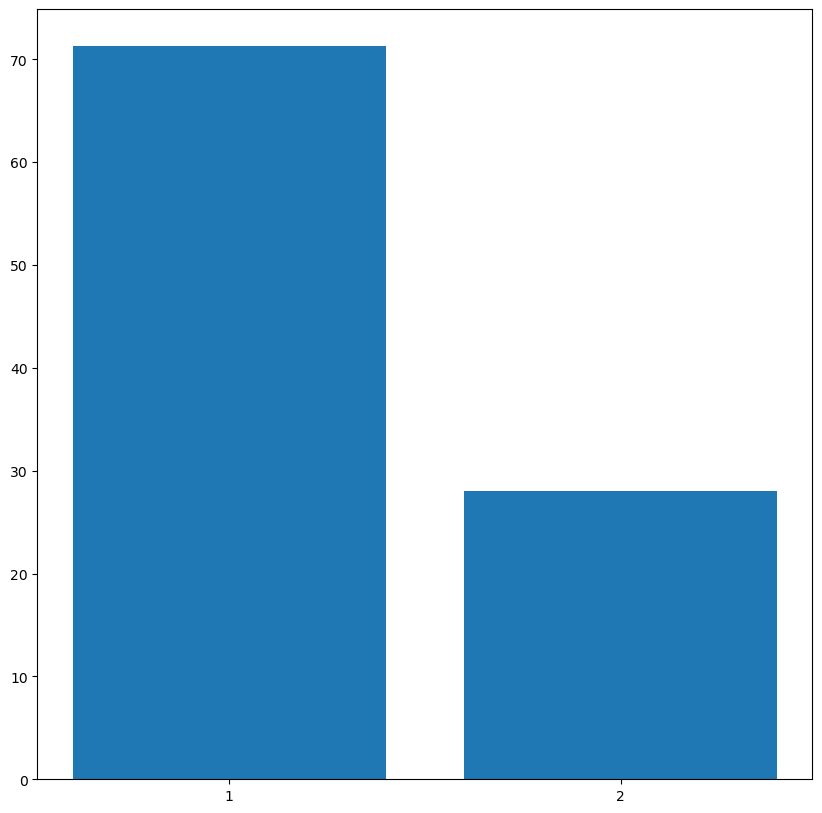

In [74]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

In [75]:
model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(data)
# print(label)

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

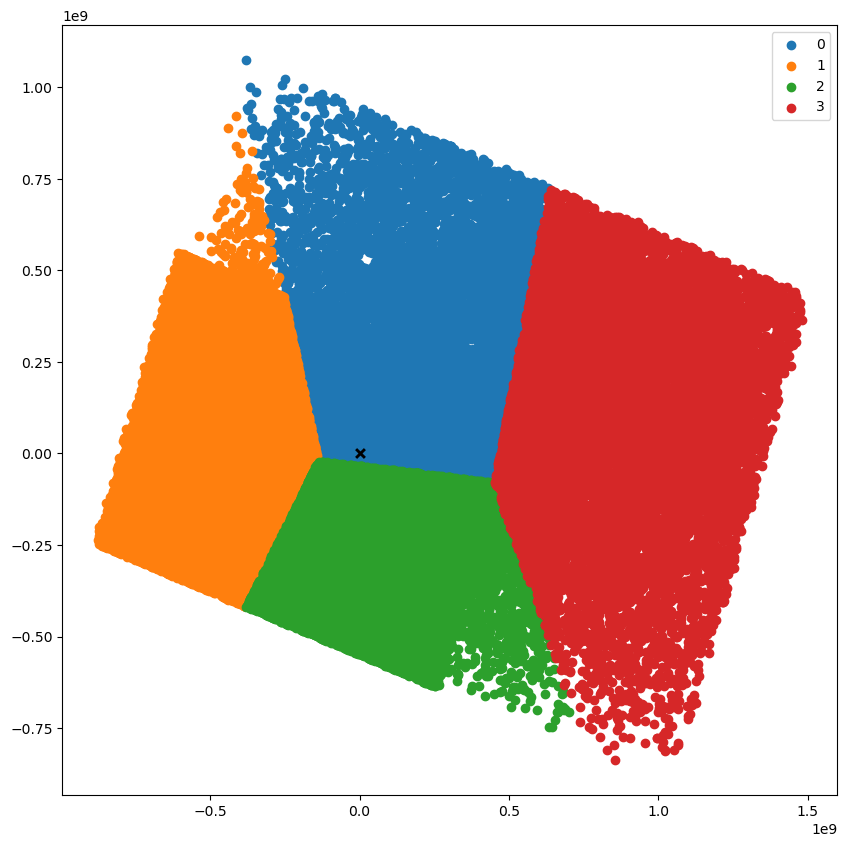

In [76]:
centers = np.array(model2.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [77]:
df_customer.columns


Index(['ID', 'total_session', 'session_duration', 'social_DL', 'Google_DL',
       'Email_DL', 'Youtube_DL', 'Netflix_DL', 'Gaming_DL', 'Other_DL',
       'Total_DL', 'social_UL', 'Google_UL', 'Email_UL', 'Youtube_UL',
       'Netflix_UL', 'Gaming_UL', 'Other_UL', 'Total_UL', 'Decile_rank'],
      dtype='object')

# Task 2

In [78]:
# sessions frequency is set as df_customer['total_session']
# the duration is also presented as df_customer['session_duration']


* In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
    - sessions frequency 
    - the duration of the session 
    - the sessions total traffic (download and upload (bytes))

### Task 2.1. Based on the above submit python script and slide :
- Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
- Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 
- Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
- Aggregate user total traffic per application and derive the top 10 most engaged users per application
- Plot the top 3 most used applications using appropriate charts.  
- Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
    - What is the optimized value of k (use elbow method for this)?  
    - Interpret your findings. 


In [79]:
df_engagement = df_customer[['ID','total_session','session_duration','Total_DL','Total_UL']].copy()

In [80]:
# Top 10 customers with high session frequency
df_engagement.iloc[df_engagement.total_session.nlargest(10).index]


,ID,total_session,session_duration,Total_DL,Total_UL
13467,"33,626,320,676.00",18.00,"103,136.50","570,733,717.00","46,812,733.00"
6404,"33,614,892,860.00",17.00,"103,136.50","570,733,717.00","46,812,733.00"
13123,"33,625,779,332.00",17.00,"103,136.50","570,733,717.00","46,812,733.00"
36909,"33,659,725,664.00",16.00,"103,136.50","570,733,717.00","46,812,733.00"
76076,"33,675,877,202.00",15.00,"103,136.50","570,733,717.00","46,812,733.00"
92583,"33,760,536,639.00",15.00,"103,136.50","570,733,717.00","46,812,733.00"
64882,"33,667,163,239.00",13.00,"103,136.50","570,733,717.00","46,812,733.00"
658,"33,603,127,838.00",12.00,"103,136.50","570,733,717.00","46,812,733.00"
1270,"33,604,515,716.00",12.00,"103,136.50","570,733,717.00","46,812,733.00"
13934,"33,627,080,969.00",12.00,"103,136.50","570,733,717.00","46,812,733.00"


In [81]:
# Top 10 customers with longer session duration
df_engagement.iloc[df_engagement.session_duration.nlargest(10).index]

,ID,total_session,session_duration,Total_DL,Total_UL
67445,"33,667,991,203.00",2.00,"370,201.00","723,405,820.00","79,645,651.00"
61426,"33,666,015,379.00",2.00,"370,148.00","980,784,017.00","90,321,035.00"
50634,"33,662,984,718.00",3.00,"370,093.00","1,307,324,111.00","107,569,704.00"
7487,"33,616,614,132.00",2.00,"370,070.00","965,190,102.00","69,053,274.00"
102992,"33,778,117,009.00",1.00,"370,043.00","569,138,141.00","48,973,200.00"
43476,"33,661,308,801.00",4.00,"369,983.00","872,259,756.00","46,812,733.00"
51853,"33,663,284,033.00",2.00,"369,966.00","351,375,978.00","75,624,774.00"
73340,"33,670,615,795.00",2.00,"369,945.00","784,025,431.00","85,435,103.00"
54142,"33,663,882,761.00",3.00,"369,919.00","1,238,807,626.00","118,097,814.00"
60029,"33,665,508,049.00",2.00,"369,916.00","381,189,686.00","75,145,720.00"


In [82]:
# Top 10 customers with largest session total trafic (Download)
df_engagement.iloc[df_engagement.Total_DL.nlargest(10).index]

,ID,total_session,session_duration,Total_DL,Total_UL
26698,"33,650,899,066.00",2.00,"51,391.00","1,496,498,888.00","63,583,647.00"
36528,"33,659,639,395.00",4.00,"103,136.50","1,496,397,052.00","46,812,733.00"
22672,"33,649,768,242.00",2.00,"68,853.00","1,496,396,835.00","73,699,746.00"
9008,"33,619,170,110.00",2.00,"74,076.00","1,496,396,253.00","98,204,433.00"
23619,"33,650,182,401.00",2.00,"137,400.00","1,496,362,687.00","83,374,368.00"
67978,"33,668,159,450.00",4.00,"341,666.00","1,496,259,000.00","46,812,733.00"
51738,"33,663,255,353.00",3.00,"103,136.50","1,496,232,116.00","89,440,796.00"
625,"33,603,062,998.00",4.00,"231,981.00","1,496,152,442.00","46,812,733.00"
12576,"33,624,914,724.00",2.00,"173,331.00","1,495,863,124.00","75,279,330.00"
96,"33,601,192,287.00",2.00,"60,455.00","1,495,848,858.00","97,939,154.00"


In [83]:
# Top 10 customers with largest session total trafic (Upload)
df_engagement.iloc[df_engagement.Total_DL.nlargest(10).index]

,ID,total_session,session_duration,Total_DL,Total_UL
26698,"33,650,899,066.00",2.00,"51,391.00","1,496,498,888.00","63,583,647.00"
36528,"33,659,639,395.00",4.00,"103,136.50","1,496,397,052.00","46,812,733.00"
22672,"33,649,768,242.00",2.00,"68,853.00","1,496,396,835.00","73,699,746.00"
9008,"33,619,170,110.00",2.00,"74,076.00","1,496,396,253.00","98,204,433.00"
23619,"33,650,182,401.00",2.00,"137,400.00","1,496,362,687.00","83,374,368.00"
67978,"33,668,159,450.00",4.00,"341,666.00","1,496,259,000.00","46,812,733.00"
51738,"33,663,255,353.00",3.00,"103,136.50","1,496,232,116.00","89,440,796.00"
625,"33,603,062,998.00",4.00,"231,981.00","1,496,152,442.00","46,812,733.00"
12576,"33,624,914,724.00",2.00,"173,331.00","1,495,863,124.00","75,279,330.00"
96,"33,601,192,287.00",2.00,"60,455.00","1,495,848,858.00","97,939,154.00"


In [84]:
df_engagement.iloc[:,1:]

,total_session,session_duration,Total_DL,Total_UL
0,1.00,"116,720.00","842,637,466.00","36,053,108.00"
1,1.00,"181,230.00","120,755,184.00","36,104,459.00"
2,1.00,"134,969.00","556,659,663.00","39,306,820.00"
3,1.00,"49,878.00","401,993,172.00","20,327,526.00"
4,2.00,"37,104.00","1,363,130,417.00","94,280,527.00"
...,...,...,...,...
106465,1.00,"8,810.00","687,925,212.00","26,716,429.00"
106466,1.00,"140,988.00","444,575,092.00","35,732,243.00"
106467,1.00,"103,136.50","194,828,056.00","37,295,915.00"
106468,1.00,"253,030.00","539,634,985.00","56,652,839.00"


## Data Normalization

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_engagement.iloc[:,1:])
scaled = scaler.fit_transform(df_engagement.iloc[:,1:])
scaled_engagement_df = df_engagement.copy()
scaled_engagement_df.iloc[:,1:] = pd.DataFrame(scaled, columns=df_engagement.columns[1:])

In [86]:
scaled_engagement_df

,ID,total_session,session_duration,Total_DL,Total_UL
0,"33,601,001,722.00",-0.49,-0.04,0.88,-0.69
1,"33,601,001,754.00",-0.49,0.80,-1.39,-0.68
2,"33,601,002,511.00",-0.49,0.19,-0.02,-0.54
3,"33,601,007,832.00",-0.49,-0.91,-0.50,-1.40
4,"33,601,008,617.00",0.75,-1.08,2.51,1.95
...,...,...,...,...,...
106465,"33,789,996,170.00",-0.49,-1.45,0.39,-1.11
106466,"33,789,997,247.00",-0.49,0.27,-0.37,-0.70
106467,"3,197,020,876,596.00",-0.49,-0.22,-1.15,-0.63
106468,"337,000,037,000,919.00",-0.49,1.73,-0.07,0.25


## K-means Classification

In [106]:
data = scaled_engagement_df.iloc[:,1:]
kmeans_model = KMeans(n_clusters = 3, init = "k-means++")
label = kmeans_model.fit_predict(data)

## compute min, max and average for each Cluster

In [109]:
# insert the K-means label into the dataset
df_engagement['label'] = label

In [132]:
columns_req = df_engagement.iloc[:,1:-1].columns

In [122]:
def compute_minmax(df,i):
    return df[df.label==i].iloc[:,1:-1].describe()
def compute_total(df,i):
    return df[df.label==i].iloc[:,1:-1].sum()

In [198]:
def compute_data(df,cluster,cols):
    mean = {}
    min_ = {}
    max_ = {}
    total = {}
    for i in range(cluster):
        for k in cols:
            mean[i,k] = compute_minmax(df,i).loc['mean'][k]
            min_[i,k] = compute_minmax(df,i).loc['min'][k]
            max_[i,k] = compute_minmax(df,i).loc['max'][k]
            total[i,k] = compute_total(df,i)[k]
            
    return mean,max_,min_,total


def compute_data2(df,cluster,cols):
    mean = {}
    min_ = {}
    max_ = {}
    total = {}
    for i in range(cluster):
        print("\nCluster: "+str(i))
        for k in cols:
            print(k)
            print("\tMean: \t" + str(compute_minmax(df,i).loc['mean'][k]))
            print("\tMinimum: \t" + str(compute_minmax(df,i).loc['min'][k]))
            print("\tMaximum: \t" + str(compute_minmax(df,i).loc['max'][k]))
#             mean[i,k] = compute_minmax(df,i).loc['mean'][k]
#             min_[i,k] = compute_minmax(df,i).loc['min'][k]
#             max_[i,k] = compute_minmax(df,i).loc['max'][k]
#             total[i,k] = compute_total(df,i)[k]
            
#     return mean,max_,min_,total

    

In [221]:
# mean, max_, min_,total =compute_data2(df_engagement,3,columns_req)

In [202]:
# Top 10 engaged users per application
df_customer.iloc[df_customer.Youtube_DL.nlargest(10).index][['ID','Youtube_DL']]

,ID,Youtube_DL
67291,"33,667,940,705.00","39,021,313.00"
37397,"33,659,840,787.00","39,021,171.00"
54256,"33,663,914,654.00","39,015,166.00"
43971,"33,661,428,821.00","39,010,469.00"
23665,"33,650,192,940.00","39,005,776.00"
18049,"33,635,391,963.00","39,004,124.00"
85484,"33,698,581,327.00","38,996,348.00"
36260,"33,659,577,025.00","38,995,692.00"
32098,"33,658,696,508.00","38,991,183.00"
69217,"33,668,563,241.00","38,990,221.00"


In [241]:
# top 3 most used applications / Per download
df_customer[df_customer.columns[3:9]].sum().nlargest(3)

Gaming_DL    55,494,362,766,987.00
Youtube_DL    1,527,607,925,078.00
Netflix_DL    1,526,476,247,939.00
dtype: float64

In [240]:
# top 3 most used applications / Per download
df_customer[df_customer.columns[11:17]].sum().nlargest(3)

Youtube_UL   1,446,803,014,001.00
Netflix_UL   1,345,918,716,724.00
Gaming_UL    1,089,991,971,488.00
dtype: float64

In [267]:
ul = dict(df_customer[df_customer.columns[11:17]].sum().nlargest(3))
dl = dict(df_customer[df_customer.columns[3:9]].sum().nlargest(3))


In [305]:
dff = pd.DataFrame.from_dict(ul,orient='index',columns=['UL'])
dff['DL'] = pd.DataFrame.from_dict(dl,orient='index').values


In [315]:
dff.transpose()['Youtube_UL']

UL    1,446,803,014,001.00
DL   55,494,362,766,987.00
Name: Youtube_UL, dtype: float64

## Elbow Method

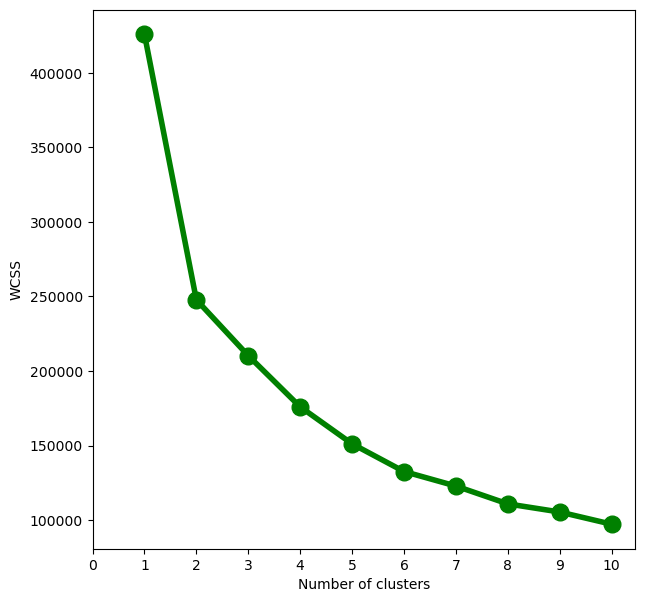

In [244]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(data)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [260]:
# since elbow occured at 2, hence the optimal number of clusters for the mall data is 5 

model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(data)

In [261]:
y_clusters

array([0, 2, 2, ..., 3, 2, 3], dtype=int32)

/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

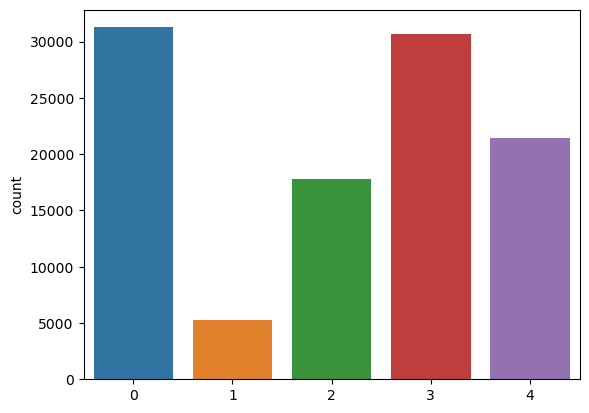

In [262]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)


<!-- - Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric  -->
<!-- - Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.  -->
- Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
<!-- - Aggregate user total traffic per application and derive the top 10 most engaged users per application -->
- Plot the top 3 most used applications using appropriate charts.  
- Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
    - What is the optimized value of k (use elbow method for this)?  
    - Interpret your findings. 


# Task 3

In [340]:
def avg_cols(dfa,dfb,cols,names):
    i = 0
    for col in cols:
        col_val = dfa.groupby('MSISDN/Number')[col].mean()
        dfb.insert(dfb.shape[1], names[i],list(col_val) )
        i+=1
    return dfb


In [360]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [399]:
def aggregate_avg(dfa,dfb,cols,names):
    
    for i in range(len(cols)):
        col_val = list(dfa.groupby('MSISDN/Number')[cols[i]].mean())
        dfb.insert(dfb.shape[1],names[i],col_val)
    return dfb

    

In [412]:
df_temp = pd.DataFrame(df_customer.iloc[:,0].copy())

exp_cols = ['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)'] 
exp_names = ['Avg_TCP_DL','Avg_TCP_UL','Avg_RTT_DL','Avg_RTT_UL','Avg_Bearer_TP_DL','Avg_Bearer_TP_UL']

df_experience = aggregate_avg(dfa=df_knn,dfb=df_temp,cols=exp_cols[:2],names=exp_names[:2])
df_experience = aggregate_cols(dfa=df_knn,dfb=df_experience,cols=exp_cols[2:],names=exp_names[2:])


In [413]:
df_experience

,ID,Avg_TCP_DL,Avg_TCP_UL,Avg_RTT_DL,Avg_RTT_UL,Avg_Bearer_TP_DL,Avg_Bearer_TP_UL
0,"33,601,001,722.00","79,202,653.33","6,063,109.00",46.00,0.00,37.00,39.00
1,"33,601,001,754.00","16,323,546.00","66,630.00",30.00,1.00,48.00,51.00
2,"33,601,002,511.00","484,125.67","70,430.33",20.33,1.33,48.00,49.00
3,"33,601,007,832.00","1,066.00","35,880.67",69.00,15.00,204.00,44.00
4,"33,601,008,617.00","4,730,044.50","80,386.83",114.00,5.00,"40,395.00","16,449.00"
...,...,...,...,...,...,...,...
106465,"33,789,996,170.00","215,044.00","3,001.00",42.00,10.00,"9,978.00",387.00
106466,"33,789,997,247.00","212,861.33","13,090.33",34.00,6.00,68.00,48.00
106467,"3,197,020,876,596.00","1,815,890.33","51,140.67",31.00,17.00,1.00,0.00
106468,"337,000,037,000,919.00","53,431,735.67","161,359.00",464.33,6.00,11.00,22.00


In [415]:
df_

[37.0,
 48.0,
 48.0,
 204.0,
 20197.5,
 3761.0,
 20485.5,
 747.0,
 38.5,
 75.0,
 31.0,
 18687.0,
 29.0,
 6.0,
 44.0,
 608.0,
 43.0,
 34682.0,
 51.0,
 70.0,
 3987.5,
 38.5,
 51.0,
 66.0,
 35.0,
 44.0,
 62.0,
 47.0,
 12122.0,
 17146.333333333332,
 40.0,
 11863.0,
 73.0,
 43.0,
 28.0,
 43.0,
 42192.0,
 29.0,
 61.0,
 3920.0,
 60713.0,
 2589.0,
 10.5,
 45.5,
 22989.5,
 6.0,
 399.0,
 415.0,
 33465.0,
 8785.0,
 54.0,
 45555.0,
 54.5,
 75.0,
 43.0,
 34.0,
 52.0,
 12578.333333333334,
 48.0,
 51701.0,
 46.0,
 44793.0,
 50607.0,
 38.0,
 47.0,
 187.0,
 18778.0,
 50.0,
 33.0,
 80738.0,
 8.0,
 23.0,
 5894.5,
 44946.0,
 25663.0,
 17830.0,
 60.0,
 41.0,
 21963.0,
 131184.0,
 67.5,
 30.0,
 53.0,
 6.0,
 44.0,
 66.0,
 47.0,
 111.0,
 8376.0,
 59.0,
 8307.0,
 6204.0,
 45.5,
 41.0,
 17873.0,
 29518.0,
 26074.0,
 85.0,
 351.0,
 70.0,
 56.0,
 48.0,
 63.0,
 35.0,
 62531.0,
 48.0,
 76.0,
 65075.5,
 9029.0,
 66.0,
 40.0,
 33.0,
 3827.0,
 152.0,
 65.0,
 10120.0,
 12908.333333333334,
 1128.0,
 6.0,
 21.0,
 60.0,
 

### 3.2 Top Values

In [416]:
# Top Values
df_experience.iloc[df_experience.Avg_Bearer_TP_DL.nlargest(10).index]

,ID,Avg_TCP_DL,Avg_TCP_UL,Avg_RTT_DL,Avg_RTT_UL,Avg_Bearer_TP_DL,Avg_Bearer_TP_UL
97231,"33,762,333,464.00","483,686.48","94,370.67",251.00,149.00,"846,163.00","56,059.00"
69657,"33,668,708,263.00","35,337,165.25","409,606.25",310.00,190.00,"680,994.00","159,430.00"
36114,"33,659,546,392.00","4,067,637.75","180,064.96",371.00,217.00,"670,930.00","127,412.00"
68770,"33,668,425,947.00","196,843,668.50","71,232.50",284.00,98.00,"658,687.00","18,171.00"
84172,"33,698,174,760.00","15,208,966.22","142,540.06",188.67,61.00,"606,931.00","11,866.00"
72882,"33,669,946,573.00","15,654,718.50","24,671.75",190.00,180.00,"581,209.00","109,606.00"
13084,"33,625,700,673.00","951,213.90","13,063.19",473.67,82.00,"556,109.00","8,070.00"
31594,"33,658,581,169.00","10,050,231.00","66,673.25",99.00,56.33,"510,852.00","11,888.00"
74315,"33,672,505,906.00","875,472.17","40,114.25",137.33,49.00,"480,466.00","34,056.00"
26076,"33,650,760,733.00","32,914,922.00","1,169,618.40",269.00,178.00,"475,751.00","45,444.00"


### 3.3 Compute & Report

In [519]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [556]:
df_temp = df.copy()
df_temp.dropna(subset=['Handset Type'],inplace=True)

In [557]:
df_exp_dist = pd.DataFrame(np.sort(list(df_temp['Handset Type'].unique())),columns=['Handset_Type'])

In [558]:
dist_col = ['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)'] 
dist_name = ['Avg_TCP_DL','Avg_TCP_UL','Avg_Bearer_TP_DL','Avg_Bearer_TP_UL']


for item in range(4):
    col_val = df_temp.groupby('Handset Type')[dist_col[item]].sum()
    df_exp_dist.insert(df_exp_dist.shape[1], dist_name[item],list(col_val) )

In [559]:
dff = pd.DataFrame(df_temp.groupby('Handset Type')[dist_col[0]].mean())
dff['TCP DL Retrans. Vol (Bytes)'].max()

1357279140.0

In [560]:
df_exp_dist.isnull().sum()

Handset_Type        0
Avg_TCP_DL          0
Avg_TCP_UL          0
Avg_Bearer_TP_DL    0
Avg_Bearer_TP_UL    0
dtype: int64

In [569]:
df_exp_dist.iloc[df_exp_dist['Avg_TCP_UL'].nlargest(10).index]

,Handset_Type,Avg_TCP_DL,Avg_TCP_UL,Avg_Bearer_TP_DL,Avg_Bearer_TP_UL
316,Huawei B528S-23A,"1,025,709,501,973.00","33,094,986,731.00","720,826,232.00","112,684,240.00"
337,Huawei E5180,"61,640,018,725.00","1,841,129,632.00","55,039,474.00","9,329,154.00"
75,Apple iPhone X (A1901),"7,439,190,005.00","566,109,687.00","49,328,216.00","7,719,281.00"
49,Apple iPhone 6 (A1586),"10,724,743,222.00","407,848,047.00","59,387,996.00","9,347,012.00"
53,Apple iPhone 6S (A1688),"11,355,287,889.00","355,207,202.00","65,169,580.00","9,128,651.00"
69,Apple iPhone 8 Plus (A1897),"4,205,767,602.00","325,623,359.00","33,537,386.00","5,724,354.00"
1395,undefined,"8,392,857,040.00","304,134,000.00","82,553,695.00","7,861,038.00"
341,Huawei E5573,"15,781,951,406.00","219,470,128.00","6,491,569.00","1,080,652.00"
56,Apple iPhone 6S Plus (A1687),"2,152,502,012.00","216,163,140.00","15,075,117.00","2,244,902.00"
66,Apple iPhone 8 (A1905),"5,522,633,060.00","204,328,184.00","50,359,567.00","7,746,985.00"



### Task 3. 1 - Aggregate, per customer, the following information
(treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput

### Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.

### Task 3.3 - Compute & report:
- The distribution of the average throughput  per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.

### Task 3.4 - Using the experience metrics above, perform a k-means clustering 
    - (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster
    - (The description must define each group based on your understanding of the data)


# Task 4

Based on the engagement analysis + the experience analysis you conducted above ,
#### Task 4. 1 - Write a python program to assign: engagement score to each user.
    - Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster(use the first clustering for this) (Euclidean Distance) experience score to each user. 
    - Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. 
#### Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 
#### Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 
#### Task 4.4 - Run a k-means (k=2) on the engagement & the experience score . 
#### Task 4.5 - Aggregate the average satisfaction & experience score per cluster. 
#### Task 4.6 - Export your final table containing 
    - all user id + engagement, experience & satisfaction scores in your local MySQL database. 
    - Report a screenshot of a select query output on the exported table. 
#### Task 4.7 Model deployment tracking- deploy the model and monitor your model. 
    - Here you can use Docker or other MlOps tools which can help you to track your model’s change.  
    - Your model tracking report includes code version, start and end time, source, parameters, metrics (loss convergence) and artefacts or any output file regarding each specific run. (CSV file, screenshot)

